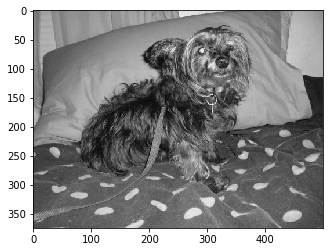

In [56]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2

DATADIR = "D:\projects\dataset\PetImages"
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break


In [57]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


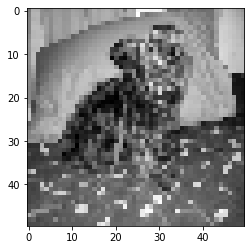

In [58]:
IMG_SIZE=50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [59]:
training_set = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_set.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [60]:
print(len(training_set))

24946


In [61]:
import random
random.shuffle(training_set)

In [62]:
for sample in training_set[:10]:
    print(sample[1])

1
0
0
0
0
1
0
0
1
1


In [63]:
X = []
y = []

In [64]:
for features, label in training_set:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [65]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



In [66]:
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)    #to load the pickle in